In [2]:
import numpy as np
from matplotlib import pyplot as plt
from manim import *

In [3]:
def func(x: np.ndarray):
    freq1 = 2
    freq2 = 5
    return np.cos(2*np.pi * freq1 * x) + np.sin(2*np.pi * freq2 * x)

def freq_calc(x: np.ndarray, frecuencia: int):
    y = np.exp(2*np.pi * 1j * x * frecuencia)
    return y.real, y.imag

def euler(x: np.ndarray):
    y = np.exp(x * 1j)
    return y.real, y.imag


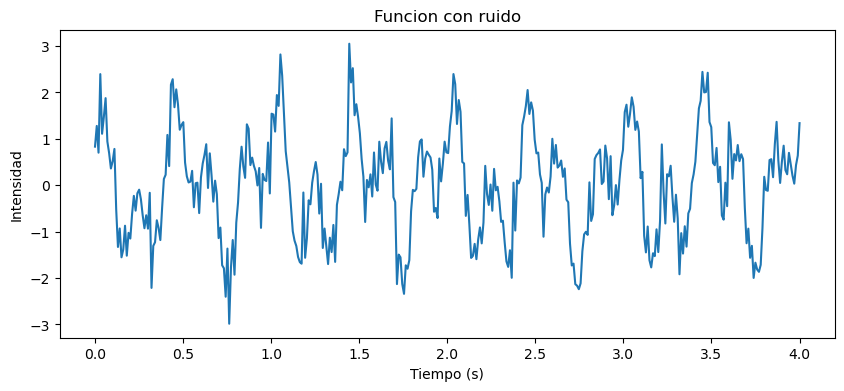

In [4]:
n = 400
time = 4
np.random.seed(2)
X = np.linspace(0, time, n)
Y_real = func(X)
Y = Y_real + 0.4 * np.random.normal(0, 1, n)

X_euler, Y_euler = euler(X)

_, ax = plt.subplots(1,1, figsize=(10, 4))
ax.plot(X, Y);
ax.set_ylabel("Intensidad")
ax.set_xlabel("Tiempo (s)")
ax.set_title("Funcion con ruido");

In [5]:
fft = np.fft.rfft(Y) / n
freq = np.fft.rfftfreq(n, X[1] - X[0])

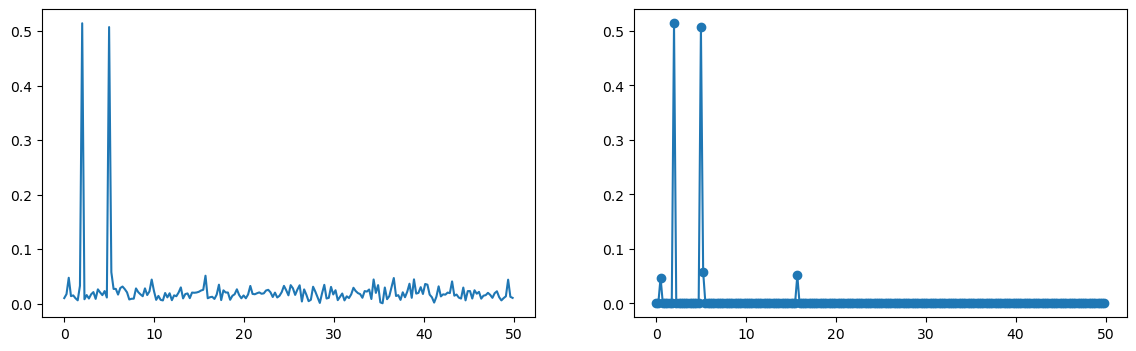

In [6]:
# umbral = 0.06
# fft_filtrado = fft * (np.abs(fft) > umbral)
fft_filtrado = np.sort(fft)[-5:]

top5 = np.argsort(np.abs(fft))[-5:]
fft_filtrado = np.zeros_like(fft, dtype=complex)
fft_filtrado[top5] = fft[top5]

_, ax = plt.subplots(1, 2, figsize=(14, 4))
ax[0].plot(freq, np.abs(fft));
# ax[0].axhline(umbral, color="red", linestyle="--");

ax[1].scatter(freq, np.abs(fft_filtrado));
ax[1].plot(freq, np.abs(fft_filtrado));
# ax[1].axhline(umbral, color="red", linestyle="--");

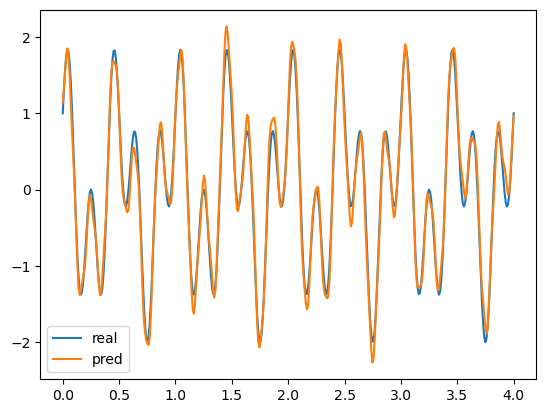

In [7]:
funciones = []
for f, c in zip(freq, fft_filtrado):
    a = 2 * c.real
    b = -2 * c.imag

    comp = a * np.cos(2*np.pi * f * X) + b * np.sin(2*np.pi * f * X)
    funciones.append(comp)

Y_PRED = np.sum(funciones, axis=0)

plt.plot(X, Y_real, label="real")
plt.plot(X, Y_PRED, label="pred");
plt.legend();

2 
8 Si compone
20 Si compone
21 
63 


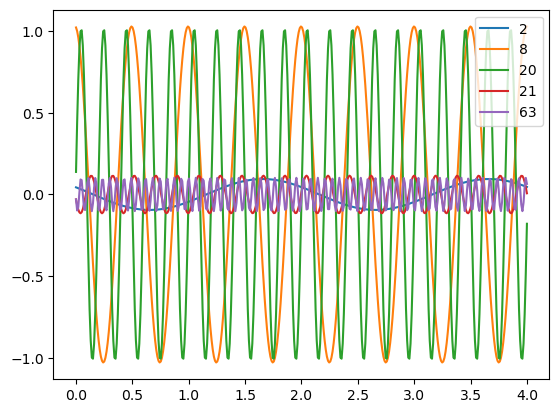

In [8]:
funciones_elegidas = []
for i, f in enumerate(funciones):
    if np.abs(fft_filtrado[i]) > 0.0:
        print(i, end=" ")
        funciones_elegidas.append(funciones[i])
        
        if np.abs(fft_filtrado[i]) > 0.3:
            print("Si compone")
        else:
            print("")
        plt.plot(X, f, label=f"{i}")

plt.legend();
# n func que si compone la funcion original

In [14]:
%%manim -pql -v WARNING Descomposicion

class Descomposicion(Scene):
    def construct(self):
        self.show_axis()
        self.wait()
        self.wait()
        self.animate()
        self.wait()
    
    def show_axis(self):
        self.ax = Axes(
            x_range=[0, time, 1],
            y_range=[-2, 2, 1],
            tips=False
        )
        self.play(Create(self.ax))
        
        self.graph = self.ax.plot_line_graph(X, Y, add_vertex_dots=False)
        self.play(Write(self.graph))
        
        self.play(
            self.ax.animate.move_to(LEFT*4).scale(0.4),
            self.graph.animate.move_to(LEFT*4).scale(0.4)
        )
    
    def animate(self):
        grupo = Group()
        g1 = self.ax.plot_line_graph(X, funciones_elegidas[0], add_vertex_dots=False)
        g1.color = RED
        new_graph = self.ax.plot_line_graph(X, Y - funciones_elegidas[0], add_vertex_dots=False)
        self.play(FadeIn(g1), Transform(self.graph, new_graph))
        self.play(g1.animate.move_to(RIGHT * 2 + UP * 3))
        grupo.add(g1)
        
        g2 = self.ax.plot_line_graph(X, funciones_elegidas[1], add_vertex_dots=False)
        g2.color = BLUE
        new_graph = self.ax.plot_line_graph(X, Y - (funciones_elegidas[0] + funciones_elegidas[1]), add_vertex_dots=False)
        self.play(FadeIn(g2), Transform(self.graph, new_graph))
        self.play(g2.animate.move_to(RIGHT * 2 + UP * 1.5))
        grupo.add(g2)
        
        g3 = self.ax.plot_line_graph(X, funciones_elegidas[2], add_vertex_dots=False)
        g3.color = GREEN
        new_graph = self.ax.plot_line_graph(X, Y - (funciones_elegidas[0] + funciones_elegidas[1] + funciones_elegidas[2]), add_vertex_dots=False)
        self.play(FadeIn(g3), Transform(self.graph, new_graph))
        self.play(g3.animate.move_to(RIGHT * 2))
        grupo.add(g3)
        
        g4 = self.ax.plot_line_graph(X, funciones_elegidas[3], add_vertex_dots=False)
        g4.color = PURPLE
        new_graph = self.ax.plot_line_graph(X, Y - (funciones_elegidas[0] + funciones_elegidas[1] + funciones_elegidas[2] + funciones_elegidas[3]), add_vertex_dots=False)
        self.play(FadeIn(g4), Transform(self.graph, new_graph))
        self.play(g4.animate.move_to(RIGHT * 2 + DOWN * 1.5))
        grupo.add(g4)
        
        g5 = self.ax.plot_line_graph(X, funciones_elegidas[4], add_vertex_dots=False)
        g5.color = ORANGE
        new_graph = self.ax.plot_line_graph(X, Y - (funciones_elegidas[0] + funciones_elegidas[1] + funciones_elegidas[2] + funciones_elegidas[3] + funciones_elegidas[4]), add_vertex_dots=False)
        self.play(FadeIn(g5), Transform(self.graph, new_graph))
        self.play(g5.animate.move_to(RIGHT * 2 + DOWN * 3))
        grupo.add(g5)
        
        self.wait()
        self.play(FadeOut(self.ax), FadeOut(self.graph), grupo.animate.move_to(LEFT * 4))
        self.wait()
        
        graph = self.ax.plot_line_graph(X, Y_PRED, add_vertex_dots=False)
        graph.move_to(RIGHT*4)
        self.play(FadeIn(graph), Transform(grupo, graph))
        self.play(graph.animate.move_to(RIGHT + LEFT).scale(1/0.4))

Manim Community v0.19.0

## Vector rotando a partir de seno y coseno

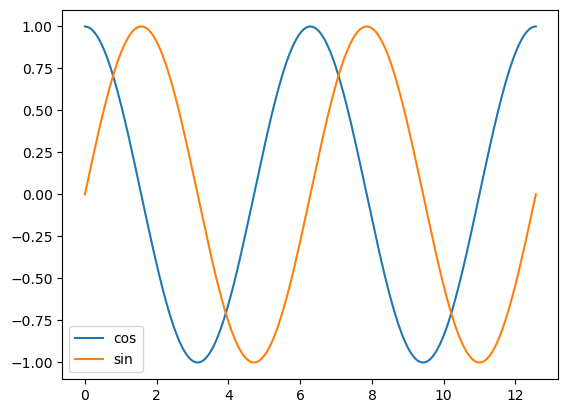

In [348]:
X = np.linspace(0, 4*np.pi, n)

plt.plot(X, np.cos(X), label="cos")
plt.plot(X, np.sin(X), label="sin")
plt.legend();

In [15]:
%%manim -pql -v WARNING VectorRotando

class VectorRotando(Scene):
    def construct(self):
        #Aca empiezo a construir los ejes, los posiciono y escalo
        ax_cos = Axes(
            x_range=[0, 4*PI, PI],
            y_range=[-1, 1, 1],
            tips=False
        )
        ax_cos.move_to(LEFT*4 + UP*2).scale(0.4)
        ax_cos_title = MathTex(r"Cos(t)").next_to(ax_cos, UP).scale(0.6)
        
        ax_sin = ax_cos.copy()
        ax_sin.move_to(LEFT*4 + DOWN*2)
        ax_sin_title = MathTex(r"Sin(t) \cdot i").next_to(ax_sin, UP).scale(0.6)
        
        ax_grid = NumberPlane(
            x_range=[-1.5, 1.5, 1],
            y_range=[-1.5, 1.5, 1]
        )
        ax_grid.move_to(RIGHT*2)
        ax_grid_title = Text("Plano complejo").next_to(ax_grid, UP).scale(0.6)
        
        self.play(Create(ax_cos), Create(ax_sin), Write(ax_cos_title), Write(ax_sin_title), Create(ax_grid), Write(ax_grid_title))
        self.wait()
        
        # A partir de aca empiezo a graficar los puntos y las funciones
        # Esto maneja el grafico sin(x)
        t2 = ValueTracker(0)
        punto_sin = always_redraw(lambda: Dot(ax_sin.c2p(t2.get_value(), np.sin(t2.get_value())), color=RED))
        curva_sin = always_redraw(
            lambda: ax_sin.plot(
                lambda x: np.sin(x),
                x_range=[0, t2.get_value()],
                color=BLUE
            )
        )
        punto_grid_sin = always_redraw(lambda: Dot(ax_grid.c2p(0, np.sin(t2.get_value())), color=RED))
        self.play(FadeIn(punto_sin), FadeIn(punto_grid_sin))
        self.wait()
        
        self.play(Create(curva_sin),
                  UpdateFromAlphaFunc(punto_sin, lambda m, a: t2.set_value(4*PI*a)),
                  UpdateFromAlphaFunc(punto_grid_sin, lambda m, a: t2.set_value(4*PI*a)),
                  run_time=8, rate_func=linear)
        self.wait()
        self.play(FadeOut(punto_sin), FadeOut(punto_grid_sin))
        t1 = ValueTracker(0)
        
        # Esto maneja el grafico cos(x)
        punto_cos = always_redraw(lambda: Dot(ax_cos.c2p(t1.get_value(), np.cos(t1.get_value())), color=RED))
        curva_cos = always_redraw(
            lambda: ax_cos.plot(
                lambda x: np.cos(x),
                x_range=[0, t1.get_value()],
                color=BLUE
            )
        )
        
        punto_grid_cos = always_redraw(lambda: Dot(ax_grid.c2p(np.cos(t1.get_value()), 0), color=RED))
        
        self.play(FadeIn(punto_cos), FadeIn(punto_grid_cos))
        self.wait()
        self.play(Create(curva_cos),
                  UpdateFromAlphaFunc(punto_cos, lambda m, a: t1.set_value(4*PI*a)),
                  UpdateFromAlphaFunc(punto_grid_cos, lambda m, a: t1.set_value(4*PI*a)),
                  run_time=8, rate_func=linear)
        self.wait()
        self.play(FadeOut(punto_cos), FadeOut(punto_grid_cos))
        
        # Aca voy a manejar ambos al mismo tiempo
        t3 = ValueTracker(0)
        punto_grid = always_redraw(lambda: Dot(ax_grid.c2p(np.cos(t3.get_value()), np.sin(t3.get_value())), color=RED))
        self.play(FadeIn(punto_grid), FadeOut(curva_cos), FadeOut(curva_sin))
        self.wait()
        self.play(
            Create(curva_cos),
            UpdateFromAlphaFunc(punto_cos, lambda m, a: t1.set_value(4*PI*a)),
            
            Create(curva_sin),
            UpdateFromAlphaFunc(punto_sin, lambda m, a: t2.set_value(4*PI*a)),
            
            UpdateFromAlphaFunc(punto_grid, lambda m, a: t3.set_value(4*PI*a)),
            run_time=10, rate_func=linear
        )
        

Manim Community v0.19.0

## Funcion input y su producto con el vector rotando

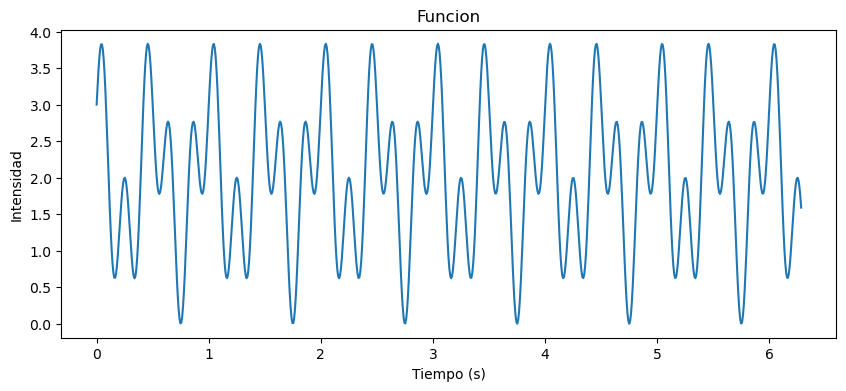

In [34]:
n = 800
time = 2*np.pi
X = np.linspace(0, time, n)
Y = func(X) + 2

X_euler, Y_euler = euler(X)

_, ax = plt.subplots(1,1, figsize=(10, 4))
ax.plot(X, Y);
ax.set_ylabel("Intensidad")
ax.set_xlabel("Tiempo (s)")
ax.set_title("Funcion");

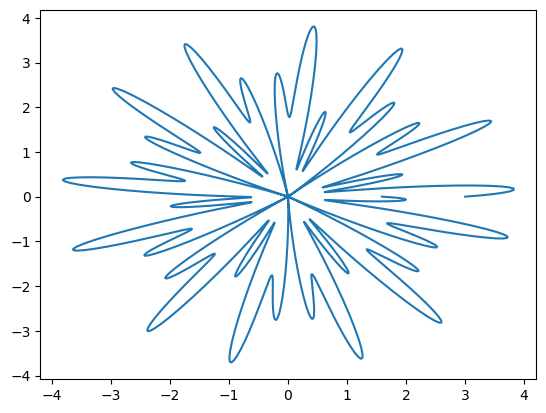

In [24]:
# plt.plot(X_euler, Y * Y_euler);
# plt.polar(X, Y)
plt.plot(X_euler * Y, Y_euler * Y);

In [25]:
%%manim -ql -v WARNING ProductoRotando

class ProductoRotando(Scene):
    def construct(self):
        # Aca creo los ejes y grillas
        ax = Axes(
            x_range=[0, 2*PI, 1],
            y_range=[0, 4, 1],
            tips=False
        )
        ax.scale(0.5).move_to(LEFT*3 + UP*1.6)
        
        grid_vector = NumberPlane(
            x_range=[-1.5, 1.5, 1],
            y_range=[-1.5 ,1.5, 1]
        )
        grid_vector.move_to(LEFT*3 + DOWN*1.5).scale(0.7)
        
        grid = NumberPlane(
            x_range=[-2, 2, 1],
            y_range=[-2 ,2, 1]
        )
        grid.move_to(RIGHT*3.5).scale(0.7)
        
        # Aca estan los titulos
        ax_title = MathTex(r"f(x)").next_to(ax, UP)
        grid_vector_title = MathTex(r"e^{i 2 \pi t}").next_to(grid_vector, LEFT)
        grid_title = MathTex(r"f(x) \cdot e^{i 2 \pi t}").next_to(grid, UP*4.5)
        
        self.play(Create(ax), Create(grid_vector), Create(grid),
                  Write(ax_title), Write(grid_vector_title), Write(grid_title))
        self.wait()
        
        # Aca grafico los datos
        graph = ax.plot_line_graph(X, Y, add_vertex_dots=False)
        
        t = ValueTracker(0)
        # Vector y trayectoria de grilla 1
        punto1 = always_redraw(
            lambda: Dot(
                grid_vector.c2p(
                    X_euler[int(t.get_value()) % n],
                    Y_euler[int(t.get_value()) % n]
                ),
                color=YELLOW
            )
        )
        vector1 = always_redraw(
            lambda: Arrow(
                start=grid_vector.c2p(0, 0),
                end=punto1.get_center(),
                buff=0,
                color=WHITE
            )
        )
        trayect1 = TracedPath(punto1.get_center, stroke_color=YELLOW, stroke_width=3)
        
        # Vector y trayectoria de grilla 2
        punto2 = always_redraw(
            lambda: Dot(
                grid.c2p(
                    X_euler[int(t.get_value()) % n] * Y[int(t.get_value()) % n],
                    Y_euler[int(t.get_value()) % n] * Y[int(t.get_value()) % n]
                ),
                color=YELLOW
            )
        )
        vector2 = always_redraw(
            lambda: Arrow(
                start=grid.c2p(0, 0),
                end=punto2.get_center(),
                buff=0,
                color=WHITE
            )
        )
        trayect2 = TracedPath(punto2.get_center, stroke_color=YELLOW, stroke_width=3)
        

        self.play(Create(vector1), FadeIn(punto1), Create(trayect1),
                  Create(vector2), FadeIn(punto2), Create(trayect2))

        # Animación: recorrer todos los puntos
        self.play(t.animate.set_value(len(X_euler)-1), Create(graph), run_time=15, rate_func=linear)
        self.wait()
        
        

Manim Community v0.19.0

## grafico "polar" a traves de la frecuencia de la funcion

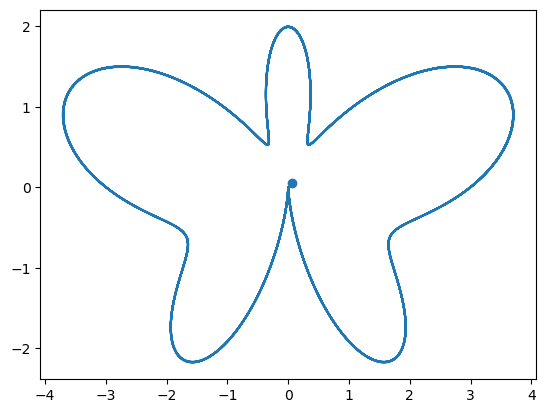

In [26]:
X_freq, Y_freq = freq_calc(X, 1)
plt.plot(X_freq * Y, Y_freq * Y);
plt.scatter(np.mean(X_freq * Y), np.mean(Y_freq * Y));

In [27]:
funciones = []
for f in range(1, 9):
    X_freqs, Y_freqs = freq_calc(X, f)
    funciones.append(np.array([X_freqs * Y, Y_freqs * Y]).T)

np.shape(funciones)

(8, 800, 2)

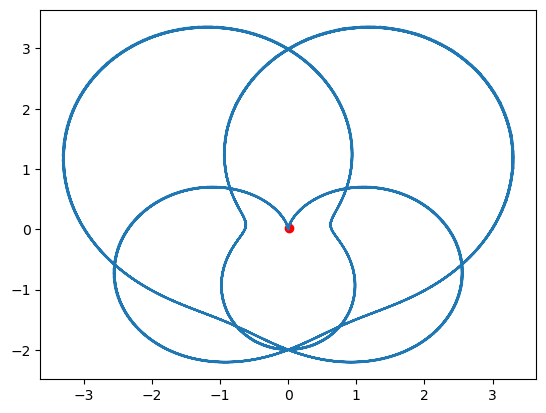

In [28]:
plt.plot(funciones[2][:,0], funciones[2][:,1]);
plt.scatter(funciones[2][:,0].mean(), funciones[2][:,1].mean(), color="red");

In [31]:
%%manim -pql -v WARNING GraficarFrecuencias

class GraficarFrecuencias(Scene):
    def construct(self):
        grid = NumberPlane(
            x_range=[-4, 4, 1],
            y_range=[-4, 4, 1],
        )
        # grid.move_to(LEFT*2)
        self.play(Create(grid))
        self.wait()
        
        frecuencia_txt = Text(f"frecuencia = {1}").move_to(LEFT*4.8 + UP*3)
        graph = grid.plot_line_graph(funciones[0][:,0], funciones[0][:,1], add_vertex_dots=False)
        
        self.play(Create(graph), Write(frecuencia_txt))
        self.wait()
        
        puntos = VGroup(*[
            Dot(grid.c2p(funciones[0][k,0], funciones[0][k,1]), color=BLUE_B, stroke_width=1)
            for k in range(0, len(funciones[0]), len(funciones[0]) // 40)
        ])
        self.play(Create(puntos))
        self.wait()
        
        centro = Dot(grid.c2p(funciones[0][:,0].mean(), funciones[0][:,1].mean()), color=PINK, stroke_width=2)
        self.play(Transform(puntos, centro))
        self.wait()
        self.play(FadeOut(centro))
        
        for i in range(1, len(funciones)):
            new_frecuencia_txt = Text(f"frecuencia = {i+1}").move_to(LEFT*4.8 + UP*3)
            new_graph = grid.plot_line_graph(funciones[i][:,0], funciones[i][:,1], add_vertex_dots=False)
            self.play(Transform(graph, new_graph), FadeOut(puntos), Transform(frecuencia_txt, new_frecuencia_txt))
            self.wait()
            
            puntos = VGroup(*[
                Dot(grid.c2p(funciones[i][k,0], funciones[i][k,1]), color=BLUE_B, stroke_width=1)
                for k in range(0, len(funciones[i]), len(funciones[i]) // 40)
            ])
            self.play(Create(puntos))
            self.wait()
            
            centro = Dot(grid.c2p(funciones[i][:,0].mean(), funciones[i][:,1].mean()), color=PINK)
            
            self.play(Transform(puntos, centro))
            self.wait()
            
            largo_vector = np.sqrt(funciones[i][:,0].mean()**2 + funciones[i][:,1].mean()**2)
            if largo_vector > 0.05:
                vector = Arrow(
                    start=grid.c2p(0,0),
                    end=centro.get_center(),
                    buff=0,
                    color=WHITE
                )
                
                self.play(Create(vector))
                self.play(vector.animate.move_to(RIGHT*5 + UP * 3 + DOWN * (i)).scale(3))
                self.wait(0.5)
                
                largo = Brace(vector, direction=[0, -1, 0])
                largo_txt = Text(f"{largo_vector:.2f}").next_to(largo, DOWN).scale(2/3)
                self.play(Write(largo), Write(largo_txt))
                self.wait(0.5)
            
            self.wait(2)
            
            

Manim Community v0.19.0

(0.0, 0.5)

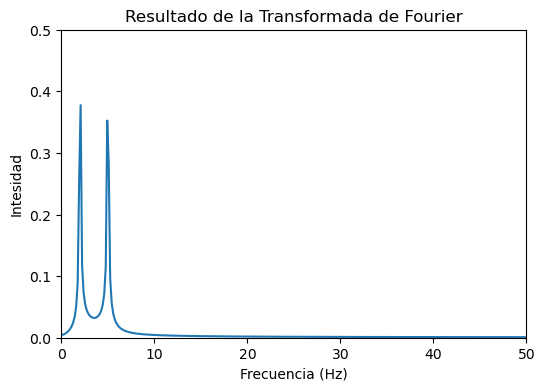

In [68]:
fft = np.fft.rfft(Y) / n
freq = np.fft.rfftfreq(n, X[1] - X[0])

# umbral = 0.06
# fft_filtrado = fft * (np.abs(fft) > umbral)
fft_filtrado = np.sort(fft)[-5:]

top5 = np.argsort(np.abs(fft))[-5:]
fft_filtrado = np.zeros_like(fft, dtype=complex)
fft_filtrado[top5] = fft[top5]

_, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(freq[1:], np.abs(fft)[1:]);

ax.set_title("Resultado de la Transformada de Fourier")
ax.set_ylabel("Intesidad")
ax.set_xlabel("Frecuencia (Hz)")
ax.set_xlim((0, 50))
ax.set_ylim((0, .5))
# ax.set_xticks(np.arange(0, 51, 10));
# ax[0].axhline(umbral, color="red", linestyle="--");

# ax[1].scatter(freq, np.abs(fft_filtrado));
# ax[1].plot(freq, np.abs(fft_filtrado));
# ax[1].set_xlim((0.1, 50))
# ax[1].set_xticks(np.arange(0, 50, 10));
# ax[1].axhline(umbral, color="red", linestyle="--");